# Proton Training and Validation Modularized

## Dependencies

In [1]:
# !pip3 install swifter
# !pip3 install xgboost
# !pip3 install tqdm
# !pip3 install category_encoders
# !pip3 install joblib
# !pip3 install scikit-plot
# !pip3 install catboost
# !pip3 install RegscorePy
# !pip3 install -U spacy
# !pip3 install gensim
# !pip3 install xlrd
# !pip3 install lightgbm
# !pip3 install hyperopt
# !pip3 install holidays
# !pip3 install textblob
# !pip3 install pydotplus
# !pip3 install graphviz
# !pip3 install imblearn
# !pip3 install missingpy
# !pip3 install urlextract
# Download en_core_web_sm for text analytics

## Main Function

/Users/thegeorgejoseph/opt/anaconda3/envs/proton/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


Enter the path here : datasets/titanic.csv
Attempting to import 100 rows of the dataset
#### RUNNING WAIT ####
extension is csv
We have a csv file
This file has 12 columns and 100 rows
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

DataFrame Succesfully imported

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Enter 'quit' to quit
What would you like to predict? : Age
Target Spotted!

Enter 'quit' to quit
Enter the Key/Identification Column : 
Key  Not found in the data
Preview can't be shown!!
Is the column 'PassengerId' an identification column? If yes, enter y : y
Identification column obtained
Do you think you have Successive Targets based on the current target? If yes, enter the column names below 
in this format separated by commas: col1,col2,col3
y

{'y'}
These columns were not found, hence not removed
Wo


LINEAR REGRESSION EQUATION:


Predicted value = 1.1115108835342093e-06*Ticket + -0.03445166496295654*Fare + -7.2063798614061705*Pclass + -3.854058110723548*Survived + -2.7344565675885835*SibSp + 0.3309416093147964*Parch + 0.8020237718499723*Embarked + 0.2051381315011281*Sex + 48.13303505490478

R squared = 0.249
(The closer R squared is to 1, the better the model is)

Where the columns are encoded like this:

+------------+--------------------+
| Embarked   |   Embarked encoded |
|------------+--------------------|
| C          |                  0 |
| Q          |                  1 |
| S          |                  2 |
| missing    |                  3 |
+------------+--------------------+
{"Embarked":{"0":"C","4":"Q","1":"S","203":"missing"},"Embarked encoded":{"0":0,"4":1,"1":2,"203":3}}
+--------+---------------+
| Sex    |   Sex encoded |
|--------+---------------|
| female |             0 |
| male   |             1 |
+--------+---------------+
{"Sex":{"0":"female","1":"male"},"

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

num_df - (143, 2)
disc_df - (143, 6)
DATE_DF - (0, 0)
TEXT_DF - (0, 0)
LAT_LONG_DF - (0, 0)
EMAIL_DF - (0, 0)
URL_DF - (0, 0)
Applying Target Encoding...
Target Encoding completed
Applying Scaling and Transformations on Validation Set...
Scaling and Transformation completed

This is final shape of X_test : (143, 8)

 #### PRINTING THE LIST OF COLUMNS AND ITS TYPES THAT ENTER THE MODEL TRAINING ####
#### PRINTING X_test ####
Index(['Ticket', 'Fare', 'Pclass', 'Survived', 'SibSp', 'Parch', 'Embarked',
       'Sex'],
      dtype='object')
Ticket      float64
Fare        float64
Pclass      float64
Survived    float64
SibSp       float64
Parch       float64
Embarked    float64
Sex         float64
dtype: object


      Ticket      Fare    Pclass  Survived     SibSp     Parch  Embarked  Sex
0   0.040213  1.000000  1.000000       0.0  0.855175  0.214086  0.545603  0.0
1   1.000000  0.621822  0.000000       1.0  0.000000  0.214086  0.000000  1.0
2   0.047284  0.565430  0.622751       0.0  0.85

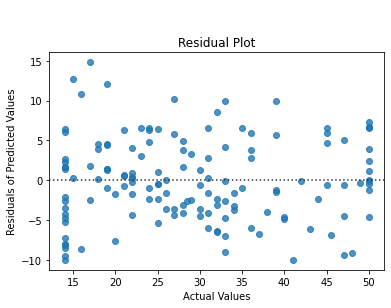

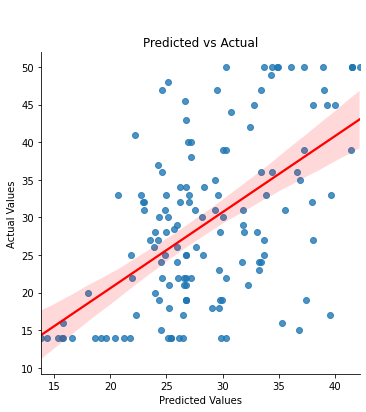


Distribution of Mean of Actual and Predicted Values by Deciles:
+----------+--------------------+-----------------------+
|   Decile |   Actualvalue_mean |   Predictedvalue_mean |
|----------+--------------------+-----------------------|
|        1 |              49.79 |                 36.21 |
|        2 |              44.54 |                 31.6  |
|        3 |              37.07 |                 31.4  |
|        4 |              32.79 |                 27.87 |
|        5 |              30.04 |                 28.06 |
|        6 |              26.64 |                 27.69 |
|        7 |              23.5  |                 28.65 |
|        8 |              20.36 |                 26.58 |
|        9 |              16.64 |                 27.61 |
|       10 |              14    |                 20.29 |
+----------+--------------------+-----------------------+
26.738 is present in 3% of the Testing Preview
25.248 is present in 2% of the Testing Preview
15.822 is present in 2% of th

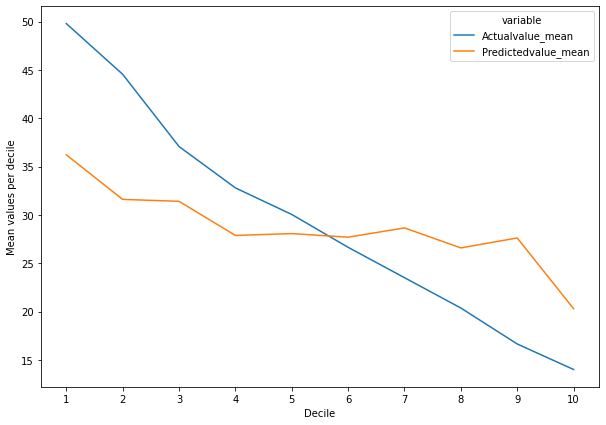

In [2]:
from userInputs import *
from INIT import *
from score import *
from all_other_functions import targetAnalysis
import time
import pandas as pd
import numpy as np
import swifter
import joblib
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from engineerings import numeric_engineering
def main():
    '''
    PROTON MAIN FUNCTION
    '''
    spinnerBool = False
    path = input('Enter the path here : ')
    error = False
    if path:
        print("Attempting to import 100 rows of the dataset")
        try:
            df,csvPath = importFile(path,nrows=100)
        except ValueError:
            error_text = "Insufficient Data Error, Please collect more information"
        df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
        df = duplicateHandler(df)
        df,update = dataHandler(df) # If first few rows contains unnecessary info
        df = duplicateHandler(df)
        info = getUserInput(df)
        if not info:
            error = True
    else:
        df = None
        print('\nInitial Import Failed, Quitting Process\n')
        info = None
        error = True

    te = time.time()
    try:
        if info:
            spinnerBool = True
            ################## TRAINING INIT ##################
            if csvPath:
                path = 'SheetSheetSheet.csv'
            df,_ = importFile(path,nrows=None)
            df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
            df = duplicateHandler(df)
            df,update = dataHandler(df) # If first few rows contains unnecessary info
            df = duplicateHandler(df)
            if update is True: #If columns are removed in dataHandler() 
                cols = df.columns.to_list()
                cols.remove(info['target'])
                info['cols'] = cols
            tts = time.time()
            if isinstance(df,pd.DataFrame):
                target = info['target']
                print("###Performing Initial Numeric Engineering for Capping Purposes###")
#                 print("Initial columns",df.columns.to_list())
                dfsamp = df.sample(n=1000,random_state=1) if len(df)>1000 else df.copy()
                dfsamp = numeric_engineering(dfsamp)
                dfsamp = dfsamp.dropna(axis=0,subset=[target])
                print("###Estimating the type of target for Capping Purposes###")
                class_or_Reg = targetAnalysis(dfsamp[target])                    
                if class_or_Reg == 'Classification':
                    if len(df) >1000000:
                        df_train, _ = train_test_split(df, train_size=1000000,random_state=1, stratify=df[target])
                        print("Dataset size has been capped to 1 million rows for better performance")
                        print("Length of the dataset is now",len(df_train))
                        init_info,validation = INIT(df_train,info)
                    else:
                        print("Dataset has not been capped")
                        print("Length of the dataset is same as original",len(df))
                        init_info,validation = INIT(df,info)
                elif class_or_Reg == 'Regression':
                    dfr = df.sample(n=1000000, random_state=1) if len(df)>1000000 else df.copy()
                    print("Dataset size has been capped to 1 million rows for better performance")
                    print("Length of the dataset is now",len(dfr))
                    init_info,validation = INIT(dfr,info)
                elif class_or_Reg is None:
                    init_info,validation = None,None
            else:
                init_info,validation = None,None
            tte = time.time()
            print('\n TOTAL TRAINING DATA CLEANING AND PLOTS : {}'.format(tte-tts))
            ################## TRAINING INIT ##################

            if isinstance(validation,pd.DataFrame):
                ################## VALIDATION AND PREDICTION ##################
                score(validation,init_info,validation=True)
                ################## VALIDATION AND PREDICTION ##################
                print('\n\t #### CODE EXECUTED SUCCESSFULLY ####')
                print('\n\t #### END ####')
            else:
                print('\n\t #### CODE DID NOT RUN COMPLETELY ####')
            spinnerBool = False
    except KeyboardInterrupt:
        print('QUITTING!')   
        return None
#     except Exception as e:
#         print('Code did not run completely')
#         print('Code ran into an error')
#         print('The error message received is')
#         print(e)
#         return None
    ee = time.time()
    print('\n#### TOTAL TIME TAKEN : {} ####'.format(ee-te))
    return 1

if __name__ == '__main__':
    # Main Function call
    ret = main()

In [3]:
pre = pd.read_csv('preview.csv')
pre.index = np.arange(1,len(pre)+1)

# Set CSS properties for th elements in dataframe
th_prop = [
    ('padding', '5px'),
    ('font-family', 'arial'),
    ('font-size', '100%'),
    ('color', 'Black'),
    ('border', '0.5px') ,
    ('border', 'solid black'),
    ('text-align', 'center')
  ]

# Set CSS properties for td elements in dataframe
td_prop = [
#     ('background', 'rgb(232, 247, 252)'),
    ('border', '0.5px'),
    ('border','solid black'),
    ('color', 'black'),
    ('font-family', 'arial')
  ]

# Set table styles
styls = [
  dict(selector="th", props=th_prop),
  dict(selector="td", props=td_prop),
  dict(selector="caption", props=[("text-align", "left"),("font-size", "120%"),("color", 'black')])
  ]

# pre.style.set_table_styles(styls).set_caption("Preview of Test Dataset(100 rows) with Predictions and Actual Values")

pre # to display only upto 3 decimal places

,PassengerId,Actual Values,Predicted Values
1,690,15.0,36.835
2,279,14.0,16.595
3,507,33.0,22.747
4,10,14.0,29.822
5,495,21.0,26.705
...,...,...,...
96,454,49.0,34.328
97,130,45.0,32.838
98,217,27.0,23.518
99,250,50.0,34.986


In [4]:
# Set CSS properties for th elements in dataframe
th_props = [
    ('background', 'rgb(12, 64, 90)'),
    ('background', 'linear-gradient(0deg, rgba(21, 112, 157) 0%, rgba(12, 64, 90) 120%)'),
    ('padding', '5px'),
    ('font-family', 'arial'),
    ('font-size', '100%'),
    ('color', 'white'),
    ('border', '0.5px') ,
    ('border', 'solid #0c405a'),
    ('text-align', 'center')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
#     ('background', 'rgb(232, 247, 252)'),
    ('border', '0.5px'),
    ('border','solid #0c405a')    
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props),
  dict(selector="caption", props=[("text-align", "left"),("font-size", "120%"),("color", 'black')])
  ]

def color_func(value):           # setting different color for F1 or RMSE column
    if value.name in ['Weighted F1','RMSE']:
        color= '#f7f7ba'
    else:
#         print(value)
        color= '#e8f7fc'
    return ['background-color: %s' %color]*len(value)


MC = pd.read_csv('MC.csv')
if 'Weighted F1' in MC.columns:          # for setting caption
    cap='This table is sorted by F1 Score(Weighted F1), higher the better'
else:
    cap ='This table is sorted by Root Mean Squared Error(RMSE), lower the better'
MC.index = np.arange(1,len(MC)+1)       # adjusting index
if 'Weighted F1' in MC.columns:        #for setting decimal places
    mc= MC.style.set_table_styles(styles).set_caption(cap).apply(color_func, axis=0).set_precision(3)
else:
    mc= MC.style.set_table_styles(styles).set_caption(cap).apply(color_func, axis=0).set_precision(2)
    
mc

,Machine Learning Model,Accuracy%,RMSE,MSE,MAE,BIC,Total time (hh:mm:ss)
1,Ensemble (CatBoost+Light Gradient Boosting Model+Linear Regression),30.85%,9.40,88.44,7.67,680.67,00:00:03
2,CatBoost,27.77%,9.61,92.39,7.73,686.92,00:00:03
3,Light Gradient Boosting Model,27.77%,9.61,92.39,7.73,686.92,00:00:00
4,Linear Regression,26.08%,9.72,94.54,8.01,690.22,00:00:00
5,Ridge Regression,25.73%,9.75,94.99,8.05,690.90,00:00:00
6,Random Forest,20.83%,10.06,101.26,8.02,700.03,00:00:00
7,Support Vector Machine,18.91%,10.18,103.71,8.25,703.46,00:00:00
8,XGBoost,12.58%,10.57,111.82,8.16,714.22,00:00:00
9,ExtraTrees Regressor,4.04%,11.08,122.74,8.79,727.54,00:00:00


In [5]:
# joblib.load('XT').min().min()


In [6]:
# joblib.load('Xt').min().min()

In [7]:
# joblib.load('XT').max().max()

In [8]:
# joblib.load('Xt').max().max()

In [9]:
# joblib.load('YT').max()

In [10]:
# joblib.load('Yt').max()

In [11]:
# joblib.load('YT').min()

In [12]:
# joblib.load('Yt').min()

In [13]:
# import pandas as pd
# # df = pd.read_csv('SheetSheetSheet.csv')
